In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Ge_calculation import GAP, MD_run
import matplotlib.pyplot as plt
from ase.io.cfg import read_cfg
from ase.io.extxyz import write_extxyz
from ase.neighborlist import neighbor_list
import numpy as np
import re
from sys import argv
import os
from ase import build, Atoms
from quippy.potential import Potential
from Ge_analysis import *
from ase.io.proteindatabank import read_proteindatabank, write_proteindatabank

In [3]:
data_dir = '/Users/Moji/Documents/Summer20/Ge/'
train_file = data_dir + 'Structure_databases/train_216_125_64_v.xyz'
val_file = data_dir + 'Structure_databases/validate_216_125_64_v.xyz'
pot_v = data_dir + 'Potentials/Ge_2bSOAP_5000_125_216_d155_v/Ge_2bSOAP_5000_125_216_d155_v.xml'

In [4]:
d155_v_test = GAP(train_file, val_file, pot_v)
d155_v_test.load('/Users/Moji/Documents/Summer20/Ge/Pickles/d155_v')
d155_v_test.cfi_i_T

Training set structure count: 281
Validation set structure count: 70
Read configs, now fixing virials
Config labels: ['amorph', 'liq', 'hiT_liq', 'hiT_amorph', 'inter']
Load successful
data_dict:  dict_keys(['QM_E_t', 'QM_F_t', 'QM_V_t', 'GAP_E_t', 'GAP_F_t', 'GAP_V_t', 'E_err_t', 'F_err_t', 'V_err_t', 'E_rmse_t', 'F_rmse_t', 'V_rmse_t', 'QM_E_v', 'QM_F_v', 'QM_V_v', 'GAP_E_v', 'GAP_F_v', 'GAP_V_v', 'E_err_v', 'F_err_v', 'V_err_v', 'E_rmse_v', 'F_rmse_v', 'V_rmse_v'])


[0, 56, 112, 168, 224, 280, None]

In [13]:
a = d155_v_test.T_configs[0][0].cell

In [15]:
len(a)

3

In [14]:
d155_v_test.calc_similarity()

/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_analysis.py:307: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


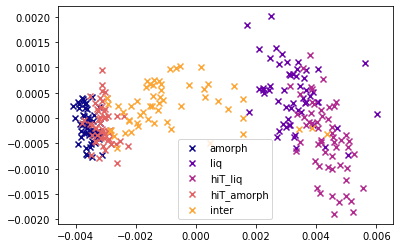

In [44]:
similarity_map(d155_v_test)

In [2]:
file = '/Users/Moji/Applications/rings-code-v1.3.4/test/gr/gr.dat'
dire = '/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_d155/run_64001/NPT/analysis/'
def read_dat(filey, head=True):
    with open(filey) as f:
        lines = f.readlines()
    ct = 0; flag = True
    while flag:
        try:
            float(lines[ct].split()[0])
            flag = False
        except ValueError:
            ct += 1
    else:
        s = 0
    dat = [[] for i in range(len(lines[1].split()))]
    for i in lines[s:]:
        d = i.split()
        for j, val in enumerate(d):
            dat[j].append(float(val))
    dat = np.array(dat)
    return dat


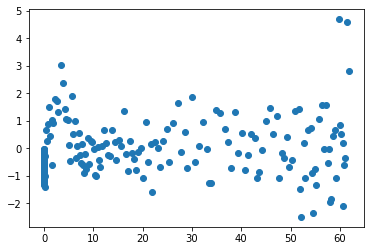

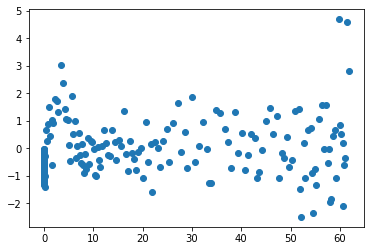

In [96]:
fig, ax = plt.subplots()
ax.scatter(gr[2], gr[1])
fig

In [3]:
sq = read_dat(dire + 'sq/sq-xrays.dat')
gr = read_dat(dire + 'gr/gr.dat')
gr[0]

ValueError: could not convert string to float: '#'

In [103]:
rstat = read_dat(dire + 'rstat/rings-3.dat')

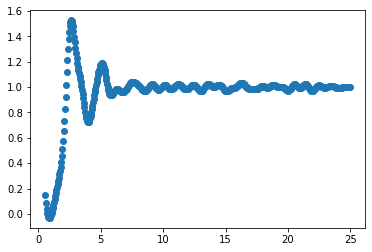

In [95]:
fig, ax = plt.subplots()
ax.scatter(sq[0], sq[1])

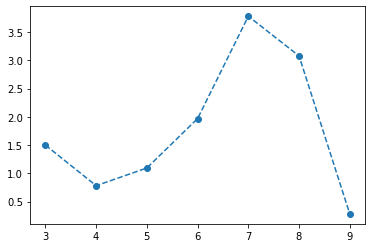

In [110]:
fig, ax = plt.subplots()
ax.scatter(rstat[0], rstat[1])
ax.plot(rstat[0], rstat[1], linestyle='--')
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/rstat.png')

In [366]:
hiT_quench_vdat = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/hiT_quench_vdat/lmprun.dat')
hiT_quench_as5_ds002_vF = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/hiT_quench_correctPOT/lmprun.dat')
slowquench = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/slowquench/run_64001/lmprun.dat')
hiT_quench = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/hiT_quench/lmprun.dat')
atom125 = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/125atom/lmprun.dat')
hiT_liq = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/hiT_liq/lmprun.dat')

In [328]:
lmp = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF/lmprun.dat', head=True)
new_lmp = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/lmprun.dat', head=True)
new_lmp_long = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/hiT_quench/lmprun.dat', head=True)
d155_lmp = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF/d155_lmprun.dat', head=True)

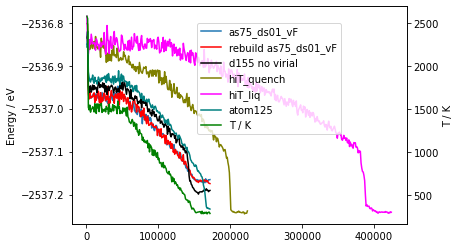

In [136]:
fig, ax = plt.subplots()
ax.plot(lmp[0][2:], lmp[6][2:], linestyle='-', label='as75_ds01_vF')
ax.plot(new_lmp[0][2:], new_lmp[6][2:], color='r', label='rebuild as75_ds01_vF')
ax.plot(d155_lmp[0][2:], d155_lmp[6][2:], color='k', label='d155 no virial')
#ax.plot(slowquench[0][2:], slowquench[6][2:], color='Purple', label='d155 no virial')
ax.plot(hiT_quench[0][2:], hiT_quench[6][2:], color='Olive', label='hiT_quench')
ax.plot(hiT_liq[0][2:], hiT_liq[6][2:], color='Magenta', label='hiT_liq')
ax.plot(atom125[0][2:], atom125[6][2:], color='Teal', label='atom125')
dax = ax.twinx()
dax.plot(lmp[0][2:], lmp[3][2:], color='g', label='T / K')
fig.legend(loc='upper right', bbox_to_anchor=(0.8, 0.8))
ax.set(ylabel='Energy / eV')
dax.set(ylabel='T / K')
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/lammps_debug.png')

In [102]:
for i in range(len(dia_s.positions)):
    dia_s.positions[i] = dia_s.positions[i] + [(np.random.rand() - 0.5) for i in range(3)]

In [18]:
from ase.io.lammpsdata import write_lammps_data
from ase.neighborlist import neighbor_list
from scipy.signal import savgol_filter

In [103]:
write_lammps_data('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/dia_rnd_2.dat', dia_s)

In [17]:
analysis = '/Users/Moji/Documents/Summer20/Ge/Analysis/'

In [8]:
param_dats = []
pots = []
configs = []
root = '/Users/Moji/Documents/Summer20/Ge/MD_runs/04_parameter_explore'
for i in os.listdir(root):
    param_dats.append(read_dat(root + '/' + i+'/lmprun.dat'))
    temp_cfgs = []
    for j in os.listdir(root + '/' + i + '/run_64001_full/NPT/'):
        temp_cfgs.append(read_cfg(root + '/' + i + '/run_64001_full/NPT/' + j))
    configs.append(temp_cfgs)
    pots.append(i)

order = [0, 2, 7, 6, 4, 5, 3, 1]
pots = [pots[i] for i in order]
configs = [configs[i] for i in order]
param_dats = [param_dats[i] for i in order]

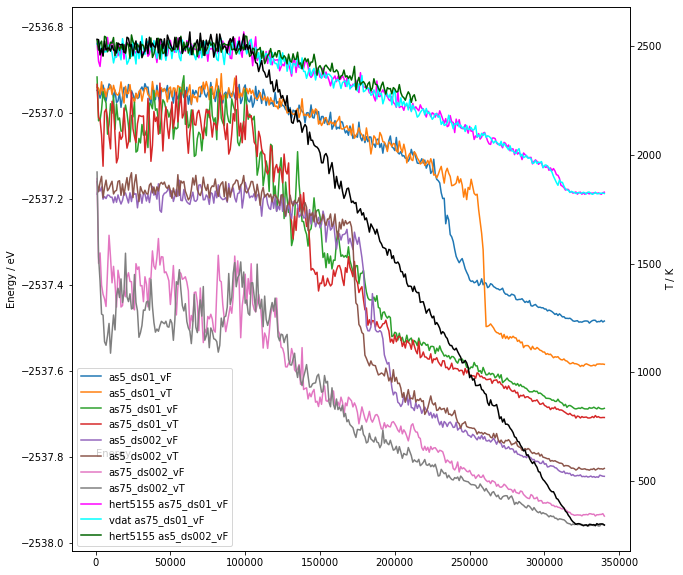

In [13]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate(param_dats):
    axs.plot(val[0][2:], val[6][2:], label=pots[i])

daxs = axs.twinx()
axs.text(0, -2537.8, 'Energy')
axs.set(ylabel='Energy / eV')
daxs.set(ylabel='T / K')
daxs.plot(param_dats[1][0][2:], np.average([param_dats[i][3][2:] for i in range(len(param_dats))], axis=0), label='T / K', color='k')
axs.plot(new_lmp_long[0][2:], new_lmp_long[6][2:], color='magenta', label='hert5155 as75_ds01_vF')
axs.plot(hiT_quench_vdat[0][2:], hiT_quench_vdat[6][2:], color='cyan', label='vdat as75_ds01_vF')
axs.plot(hiT_quench_as5_ds002_vF[0][2:], hiT_quench_as5_ds002_vF[6][2:], color='DarkGreen', label='hert5155 as5_ds002_vF')
axs.plot(as6_ds002_vF[0][2:], hiT_quench_as5_ds002_vF[6][2:], color='DarkGreen', label='hert5155 as5_ds002_vF')
axs.legend()
fig.savefig(analysis+'energies.png', bbox_inches='tight')


In [9]:
for k, i in enumerate(param_dats):
    temp = [i[9][j] - i[9][j-1] for j in range(1, len(i[-1]))]
    temp.insert(0,0)
    param_dats[k] = np.append(i, abs(np.array([temp])), axis=0)
    temp = [np.average(np.bincount(neighbor_list('i', j, 3.1))) for j in configs[k]]
    temp.insert(0, 0)
    temp.insert(0, 0)
    temp.insert(0, 0)
    param_dats[k] = np.append(param_dats[k], np.array([temp]), axis=0)

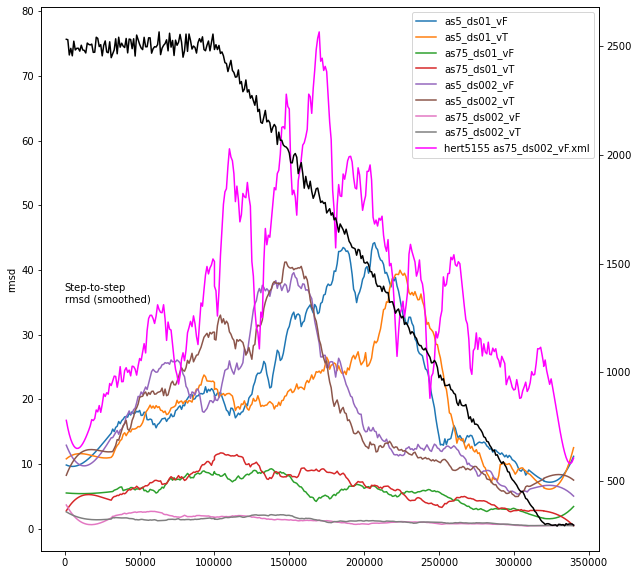

In [335]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate(param_dats):
    yhat = savgol_filter(val[10][2:], 61, 3)
    #axs.scatter(val[0][2:], val[-1][2:], label=pots[i])
    axs.plot(val[0][2:], yhat, label=pots[i])


yhat = savgol_filter(new_lmp_long[10][2:], 31, 3)
axs.plot(new_lmp_long[0][2:], yhat, color='magenta', label='hert5155 as75_ds002_vF.xml')
daxs = axs.twinx()
axs.legend()
axs.text(0, 35, 'Step-to-step\nrmsd (smoothed)')
axs.set(ylabel='rmsd')
daxs.plot(param_dats[1][0][2:], np.average([param_dats[i][3][2:] for i in range(len(param_dats))], axis=0), label='T / K', color='k')
fig.savefig(analysis+'rmsd.png', bbox_inches='tight')

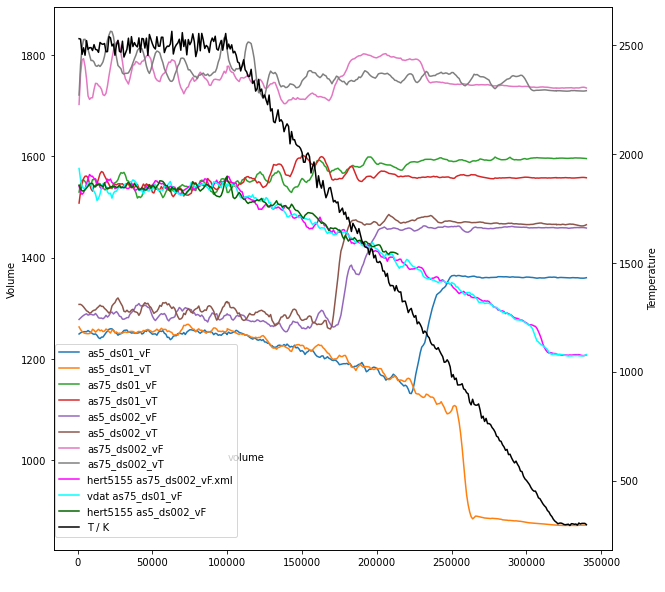

In [368]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate(param_dats):
    yhat = savgol_filter(val[8][2:], 11, 3)
    #axs.scatter(val[0][2:], val[-1][2:], label=pots[i])
    axs.plot(val[0][2:], yhat, label=pots[i])

daxs = axs.twinx()
daxs.plot(param_dats[1][0][2:], np.average([param_dats[i][3][2:] for i in range(len(param_dats))], axis=0), label='T / K', color='k')
yhat = savgol_filter(new_lmp_long[8][2:], 11, 3)
axs.plot(new_lmp_long[0][2:], yhat, color='magenta', label='hert5155 as75_ds002_vF.xml')
yhat = savgol_filter(hiT_quench_vdat[8][2:], 11, 3)
axs.plot(hiT_quench_vdat[0][2:], yhat, color='cyan', label='vdat as75_ds01_vF')
yhat = savgol_filter(hiT_quench_as5_ds002_vF[8][2:], 11, 3)
axs.plot(hiT_quench_as5_ds002_vF[0][2:], yhat, color='DarkGreen', label='hert5155 as5_ds002_vF')
fig.legend(loc='lower left', bbox_to_anchor=(0.07,0.07))
axs.set(ylabel='Volume')
axs.text(100000, 1000, 'volume')
daxs.set(ylabel='Temperature')
fig.savefig(analysis+'volumes.png', bbox_inches='tight')

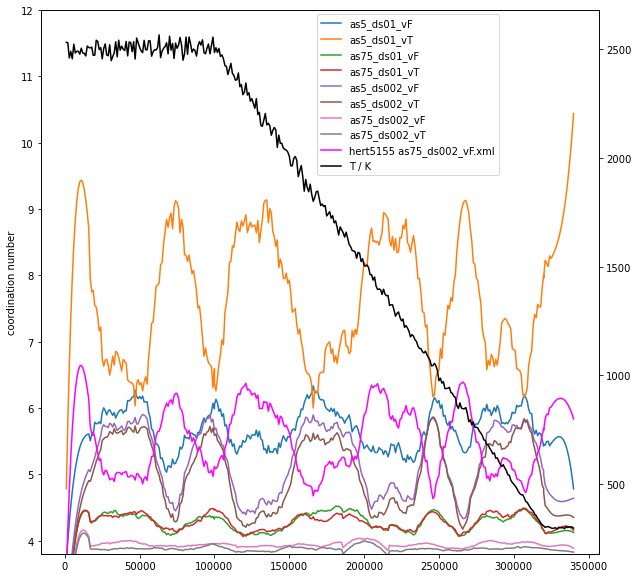

In [349]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate(param_dats):
    yhat = savgol_filter(val[11][2:], 31, 3)
    #axs.plot(val[0][2:], val[11][2:], label=pots[i])
    axs.plot(val[0][2:], yhat, label=pots[i])

yhat = savgol_filter(new_lmp_long[11][2:], 31, 3)
axs.plot(new_lmp_long[0][2:], yhat, color='magenta', label='hert5155 as75_ds002_vF.xml')
daxs = axs.twinx()
daxs.plot(param_dats[1][0][2:], np.average([param_dats[i][3][2:] for i in range(len(param_dats))], axis=0), label='T / K', color='k')
axs.set(ylim=(3.8, 12), ylabel='coordination number')
fig.legend(bbox_to_anchor=(0.7,0.79))
fig.savefig(analysis+'coordination.png', bbox_inches='tight')

In [329]:
rooty= '/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/hiT_quench/run_64001/NPT'
new_cfgs = []
for j in os.listdir(rooty):
    new_cfgs.append(read_cfg(rooty + '/' + j ))
i = new_lmp_long
temp = [i[9][j] - i[9][j-1] for j in range(1, len(i[-1]))]
temp.insert(0,0)
new_lmp_long = np.append(i, abs(np.array([temp])), axis=0)
temp = [np.average(np.bincount(neighbor_list('i', j, 3.1))) for j in new_cfgs]
temp.insert(0, 0)
temp.insert(0, 0)
temp.insert(0, 0)
new_lmp_long = np.append(new_lmp_long, np.array([temp]), axis=0)

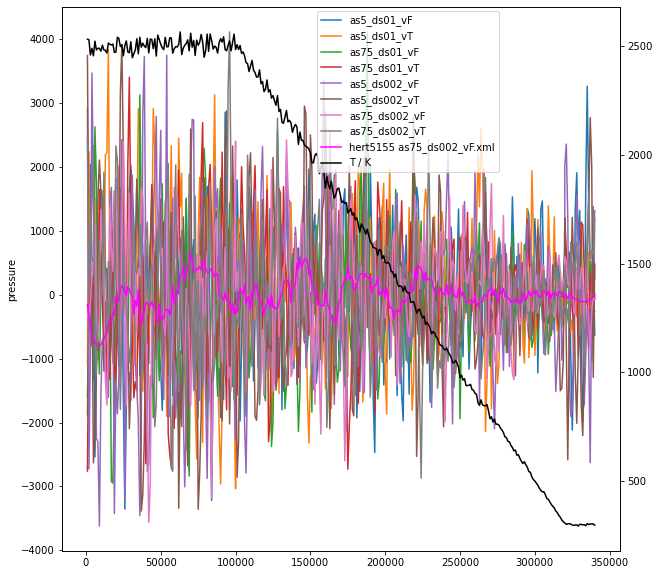

In [355]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate(param_dats):
    yhat = savgol_filter(val[5][2:], 5, 3)
    #axs.plot(val[0][2:], val[5][2:], label=pots[i])
    axs.plot(val[0][2:], yhat, label=pots[i])

yhat = savgol_filter(new_lmp_long[5][2:], 31, 3)
axs.plot(new_lmp_long[0][2:], yhat, color='magenta', label='hert5155 as75_ds002_vF.xml')
daxs = axs.twinx()
daxs.plot(param_dats[1][0][2:], np.average([param_dats[i][3][2:] for i in range(len(param_dats))], axis=0), label='T / K', color='k')
axs.set(ylabel='pressure')
fig.legend(bbox_to_anchor=(0.7,0.79))


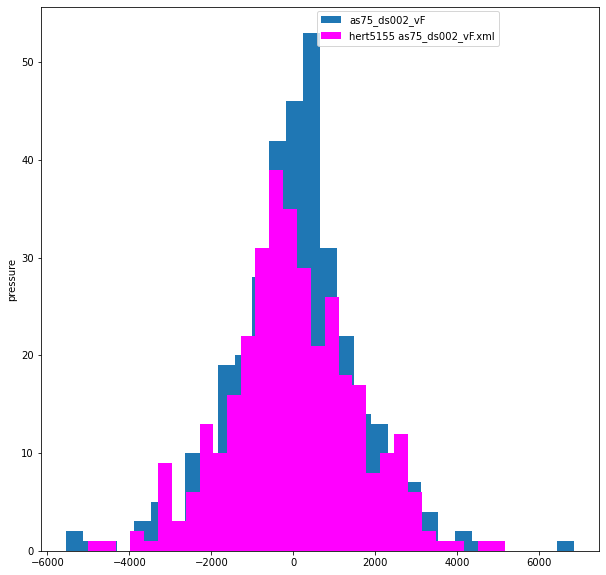

In [361]:
fig, axs = plt.subplots(figsize=(10,10))

'''for i, val in enumerate(param_dats):
    axs.hist(val[5][2:], label=pots[i], bins=20)'''

axs.hist(param_dats[6][5][2:], label=pots[6], bins=30)
axs.hist(new_lmp_long[5][2:], bins=30, color='magenta', label='hert5155 as75_ds002_vF.xml')
axs.set(ylabel='pressure')
fig.legend(bbox_to_anchor=(0.7,0.79))

In [12]:
hiT_quench_vdat = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/hiT_quench_vdat/lmprun.dat')
hiT_quench_as5_ds002_vF = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/hiT_quench_correctPOT/lmprun.dat')
slowquench = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/slowquench/run_64001/lmprun.dat')
hiT_quench = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/hiT_quench/lmprun.dat')
atom125 = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/125atom/lmprun.dat')
hiT_liq = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/hiT_liq/lmprun.dat')

In [13]:
lmp = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF/lmprun.dat', head=True)
new_lmp = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/lmprun.dat', head=True)
new_lmp_long = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF_newlmp/hiT_quench/lmprun.dat', head=True)
d155_lmp = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/as75_ds01_vF/d155_lmprun.dat', head=True)

In [15]:
#myruns as tests for lammps
lammps = '/Users/Moji/Documents/Summer20/Ge/MD_runs/'
as6_ds002_vT = read_dat(lammps + 'as6_ds002_vT/lmprun.dat')

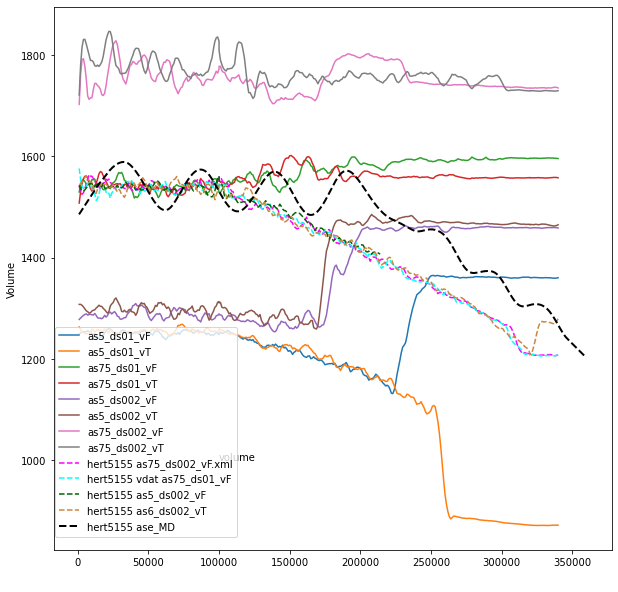

In [43]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate(param_dats):
    yhat = savgol_filter(val[8][2:], 11, 3)
    #axs.scatter(val[0][2:], val[-1][2:], label=pots[i])
    axs.plot(val[0][2:], yhat, label=pots[i])

#daxs = axs.twinx()
#daxs.plot(param_dats[1][0][2:], np.average([param_dats[i][3][2:] for i in range(len(param_dats))], axis=0), label='T / K', color='k')

yhat = savgol_filter(new_lmp_long[8][2:], 11, 3)
axs.plot(new_lmp_long[0][2:], yhat, color='magenta', label='hert5155 as75_ds002_vF.xml', linestyle='--')
yhat = savgol_filter(hiT_quench_vdat[8][2:], 11, 3)
axs.plot(hiT_quench_vdat[0][2:], yhat, color='cyan', label='hert5155 vdat as75_ds01_vF', linestyle='--')
yhat = savgol_filter(hiT_quench_as5_ds002_vF[8][2:], 11, 3)
axs.plot(hiT_quench_as5_ds002_vF[0][2:], yhat, color='DarkGreen', label='hert5155 as5_ds002_vF', linestyle='--')
yhat = savgol_filter(as6_ds002_vT[8][2:], 11, 3)
axs.plot(as6_ds002_vT[0][2:], yhat, color='Peru', label='hert5155 as6_ds002_vT', linestyle='--')
yhat = savgol_filter(ase_MD[4], 31, 1)
axs.plot(ase_MD[0]*1000*9, yhat, color='k', label='hert5155 ase_MD', linestyle='--', linewidth=2)

fig.legend(loc='lower left', bbox_to_anchor=(0.07,0.07))
axs.set(ylabel='Volume')
axs.text(100000, 1000, 'volume')
#daxs.set(ylabel='Temperature')
fig.savefig(analysis+'volumes.png', bbox_inches='tight')

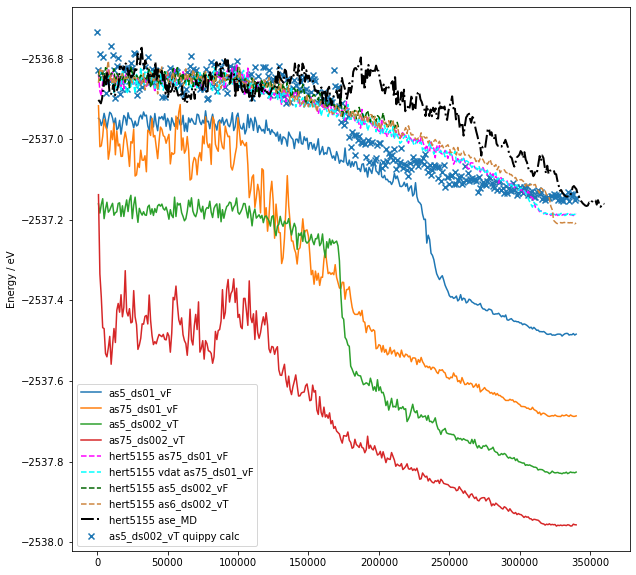

In [72]:
fig, axs = plt.subplots(figsize=(10,10))
for i, val in enumerate(param_dats):
    if i == 0 or i==2 or i==5 or i==7:
        axs.plot(val[0][2:], val[6][2:], label=pots[i])

#daxs = axs.twinx()
axs.set(ylabel='Energy / eV')
#daxs.set(ylabel='T / K')
#daxs.plot(param_dats[1][0][2:], np.average([param_dats[i][3][2:] for i in range(len(param_dats))], axis=0), label='T / K', color='k')
axs.plot(new_lmp_long[0][2:], new_lmp_long[6][2:], color='magenta', label='hert5155 as75_ds01_vF', linestyle='--')
axs.plot(hiT_quench_vdat[0][2:], hiT_quench_vdat[6][2:], color='cyan', label='hert5155 vdat as75_ds01_vF', linestyle='--')
axs.plot(hiT_quench_as5_ds002_vF[0][2:], hiT_quench_as5_ds002_vF[6][2:], color='DarkGreen', label='hert5155 as5_ds002_vF', linestyle='--')
axs.plot(as6_ds002_vT[0][2:], as6_ds002_vT[6][2:], color='Peru', label='hert5155 as6_ds002_vT', linestyle='--')
axs.plot(ase_MD[0]*1000*9, ase_MD[2], color='k', label='hert5155 ase_MD', linestyle='-.', linewidth=2)
axs.scatter(ase_time, ase_sps/64, marker='x', label='as5_ds002_vT quippy calc')
axs.legend()
fig.savefig(analysis+'energies.png', bbox_inches='tight')

In [6]:
ase_MD = read_dat('/Users/Moji/Documents/Summer20/Ge/MD_runs/ase_MD/md.log')


In [10]:
from ase.io import read


In [53]:
as5_ds002_vT_pot = Potential(param_filename='/Users/Moji/Documents/Summer20/Ge/Potentials/parameter_explore/as5_ds002_vT.xml')

In [54]:
pot_test = [i for i in configs[5]]
for i in pot_test:
    i.set_atomic_numbers([32 for i in range(64)])
    i.set_calculator(as5_ds002_vT_pot)

In [62]:
ase_sps = np.array([i.get_potential_energy() for i in pot_test])


In [60]:
ase_time = []
root = '/Users/Moji/Documents/Summer20/Ge/MD_runs/04_parameter_explore'
for j in os.listdir(root + '/as5_ds002_vT' + '/run_64001_full/NPT'):
    if 'cfg' in j:
        ase_time.append(int(j.split('.')[1]))
ase_time = np.array(ase_time)

In [61]:
os.getcwd()
os.chdir('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/125atom')

In [94]:
a = rings('ringy', cfg_file='run_64001/NPT/dump_npt_Ge_gap.100000.cfg', opts={'S(q)':True})
type(a)

int

In [37]:
cell = d155_v_test.T_configs[0][0].cell
cell

Cell([11.4814272, 11.4814272, 11.4814272])

In [33]:
np.diag(cell)

array([11.4814272, 11.4814272, 11.4814272])

In [31]:
a = np.array([1.0,2,3])
d = np.diag(a)
# or simpler: d = np.diag([1,2,3,4])

print(d)

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]


In [30]:
a


array([1., 2., 3., 4.])

In [66]:
type(True)

bool

In [ ]:
cell = cell.tolist()

In [40]:
cell

[[11.4814272, 0.0, 0.0], [0.0, 11.4814272, 0.0], [0.0, 0.0, 11.4814272]]

In [50]:
f = read_cfg('run_64001/NPT/dump_npt_Ge_gap.100000.cfg')


In [51]:
len(f)


125

In [53]:
write_proteindatabank('test', f)

In [47]:
test = MD_run('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/125atom/run_64001')

In [89]:
a = ''
a = a.split()
a.append('')

In [90]:
a[0]

''

In [102]:
test.dat

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+03, ..., 1.7000000e+05,
        1.7100000e+05, 1.7200000e+05],
       [0.0000000e+00, 0.0000000e+00, 1.1884909e+02, ..., 2.1432987e+03,
        2.2615546e+03, 2.3700463e+03],
       [2.5000000e+03, 2.5000000e+03, 2.5100977e+03, ..., 2.8276245e+02,
        2.8959717e+02, 2.6179363e+02],
       ...,
       [2.5948523e+03, 2.5948523e+03, 2.9777812e+03, ..., 2.2633125e+03,
        2.2559119e+03, 2.2638572e+03],
       [0.0000000e+00, 0.0000000e+00, 2.9930595e+03, ..., 2.2655196e+03,
        2.2655608e+03, 2.2660322e+03],
       [0.0000000e+00, 0.0000000e+00, 1.6388681e+01, ..., 9.6120971e+02,
        9.5848584e+02, 9.6115103e+02]])

In [107]:
write_proteindatabank('test.pdb', test.configs[:2])

In [109]:
a = [read_proteindatabank('test.pdb', index=i) for i in range(len())

/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/ase/io/proteindatabank.py:109: UserWarning: Length of residuenumbers array, 250, different from number of atoms 125
  warnings.warn('Length of {} array, {}, '


In [133]:
os.mkdir('rings_runs')
os.chdir('rings_runs')
test.Gr = []
for i, val in enumerate(test.configs):
    rings(str(i), atoms=val)
    test.Gr.append(read_dat(str(i)+'/gr/gr.dat'))
os.chdir('../')

In [48]:
test.Sq = []
sorty = []
for i in os.listdir('rings_runs'):
    sorty.append(i)
    test.Sq.append(read_dat('rings_runs/' + i + '/sq/sq-xrays.dat'))

test.Sq = [test.Sq[int(i)] for i in sorty]

In [6]:
os.chdir('/Users/Moji/Documents/Summer20/Ge/MD_runs/lammps_structure_test/125atom')

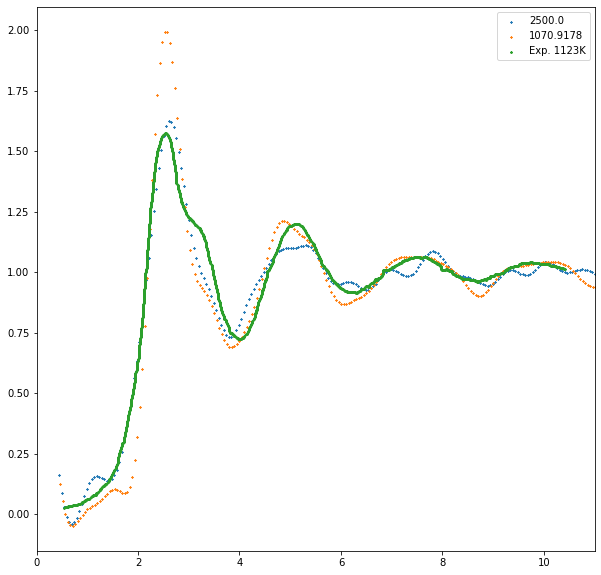

In [55]:
fig, axs = plt.subplots(figsize=(10,10))
axs.scatter(test.Sq[0][0], test.Sq[0][1], s=2, marker='x', label=test.dat[2][0])
axs.scatter(test.Sq[100][0], test.Sq[100][1], s=2, marker='x', label=test.dat[2][100])
axs.scatter(exp_Sq.T[0], exp_Sq.T[1], s=4, marker='*', label='Exp. 1123K')
axs.set(xlim=(0,11))
axs.legend()

In [40]:
exp_Sq = np.genfromtxt('/Users/Moji/Documents/paper_data/Ge_Sq_exp.txt', delimiter=', ', skip_header=1)


In [45]:
test.timesteps.index('100000')

125

In [49]:
test.dat_head

['Step',
 'CPU',
 'Temp',
 'f_TempAve',
 'Press',
 'f_PressAve',
 'f_PEAve_Atom',
 'Volume',
 'f_vAve',
 'c_MSD[4]']

In [78]:
type(False) is bool

True

In [85]:
def f(**k):
    for i in k:
        print(i, k[i])


In [87]:
f(x='a')

x a
